## Import Libraries

In [1]:
#Load Packages
import requests 
import pandas as pd 
import time
import re

from bs4 import BeautifulSoup
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.chrome.service import Service 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import StaleElementReferenceException

### Google Playstore Reviews 

In [2]:
current_url = 'https://play.google.com/store/apps/details?id=com.ubercab.eats&hl=en&showAllReviews=true'

<!DOCTYPE html>
<html dir="ltr" lang="en"><head><base href="https://play.google.com/"/><meta content="origin" name="referrer"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="yes" name="mobile-web-app-capable"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="sBw2N8uateIzRr93vmFze5MF_35vMk5F1wG04L5JcJE" name="google-site-verification"/><meta content="PJKdyVFC5jlu_l8Wo_hirJkhs1cmitmn44fgpOc3zFc" name="google-site-verification"/><link href="/opensearch.xml" rel="search" title="Google Play" type="application/opensearchdescription+xml"/><link href="//www.gstatic.com/android/market_images/web/favicon_v3.ico" rel="shortcut icon"/><script data-id="_gd" nonce="F3fqNbp8el2f05tqDoQNYQ">window.WIZ_global_data = {"AKEyDc":"%.@.[\"com.ncsoft.baseball.h3\",\"com.ncsoft.lineagem19\",\"com.ncsoft.lineage2m19\",\"com.ncsoft.tricksterm\",\"com.ncsoft.tricksterm19\",\"com.ncsoft.bns2\",\"com.ncsoft.bns219\",\"com.ncsoft.lineage2mjp\",\"com.ncsoft
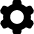
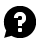
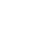
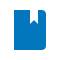
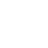
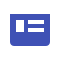
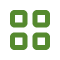
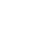
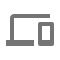
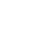
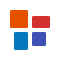
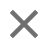
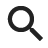
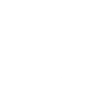
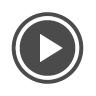

In [3]:
resp = requests.get(current_url)
content = BeautifulSoup(resp.content, 'lxml')
print(content)

In [4]:
def google_play_store(url):
    # Set up the Chrome driver service
    service = Service(executable_path="C:\\Program Files (x86)\\chromedriver.exe")
    # Instantiate the webdriver with the above service
    driver = webdriver.Chrome(service=service)
    # Go to the page you want to scrape
    driver.get(url)

    # Find and click see all reviews button using explicit wait
    see_all_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//span[text()='See all reviews']"))
    )
    see_all_button.click()

    # Get the reviews container to scroll down later on
    reviews_container = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, 'fysCi'))
    )

    review_list = []
    count = 1

    start_time = time.time()
    scroll_duration = 1200  # 2 minutes
    while time.time() - start_time < scroll_duration:
        driver.execute_script("arguments[0].scrollBy(0, 1000);", reviews_container)

    while count <= 5000:
        # Get all the review elements
        content = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CLASS_NAME, 'RHo1pe'))
        )

        # Process a batch of reviews
        for post in content:
            try:
                review = post.find_element(By.CLASS_NAME, 'h3YV2d').text
                date = post.find_element(By.CLASS_NAME, 'bp9Aid').text
                stars_el = post.find_element(By.CLASS_NAME, 'iXRFPc')
                stars_label = stars_el.get_attribute('aria-label')
                name = post.find_element(By.CLASS_NAME, 'X5PpBb').text

                data = {
                    "review": review,
                    "date": date,
                    "stars": stars_label,
                    "name": name,
                    "source": "Google Play Store",
                }
                review_list.append(data)

                count += 1
                if count > 5000:
                    break

            except Exception as e:
                print(e)
                continue

    driver.quit()

    return pd.DataFrame(review_list)

In [5]:
df_reviews = google_play_store(current_url)  
df_reviews

,review,date,stars,name,source
0,Edit: they brought the feature back! Used to b...,"January 18, 2024",Rated 5 stars out of five stars,Rufus Wright,Google Play Store
1,Disappointed. Order cancelled by the system/dr...,"January 21, 2024",Rated 1 stars out of five stars,Aaron Loh,Google Play Store
2,Lately it's very common to wait over 2 hours f...,"January 20, 2024",Rated 1 stars out of five stars,Bastian H,Google Play Store
3,Normally my experience with the app isn't bad ...,"January 24, 2024",Rated 1 stars out of five stars,T H,Google Play Store
4,Love it. Great offers. Good selections. Food a...,"January 20, 2024",Rated 5 stars out of five stars,Andrew Higgs,Google Play Store
...,...,...,...,...,...
4995,Uber one terms require that if it's within 48h...,"August 15, 2023",Rated 1 stars out of five stars,John Paul O'Loughlin,Google Play Store
4996,I'm always satisfied with Uber Eats. The drive...,"September 1, 2023",Rated 5 stars out of five stars,Maria Hillenbrand,Google Play Store
4997,Twice in one week my wife and son ordered food...,"August 15, 2023",Rated 1 stars out of five stars,Jackson McClelland,Google Play Store
4998,Kind of a mixed bag to be honest. There's a lo...,"September 25, 2023",Rated 3 stars out of five stars,Gelasia Kidd,Google Play Store


In [6]:
df_reviews.to_csv("Google_Playstore.csv", index= False)

In [7]:
unique_counts = df_reviews.nunique()
print(unique_counts)
print(df_reviews.shape)

review    5000
date       180
stars        5
name      4941
source       1
dtype: int64
(5000, 5)


### Secondary Method to do the above using library

In [8]:
from google_play_scraper import Sort, reviews_all , app
import plotly.express as px

In [9]:
ubereats_project = reviews_all("com.ubercab.eats", sleep_milliseconds=0, lang='en', country='us',sort=Sort.NEWEST)

In [10]:
library_df = pd.json_normalize(ubereats_project)

In [11]:
library_df.nunique()

reviewId                98306
userName                64478
userImage               67280
content                 98147
score                       5
thumbsUpCount             365
reviewCreatedVersion      372
at                      98258
replyContent            25230
repliedAt               30078
appVersion                372
dtype: int64

In [12]:
library_df.shape

(98306, 11)

## Consumer Affairs Web Scraping

In [13]:
base_url = 'https://www.consumeraffairs.com/food/uber-eats.html?page='
urls = [base_url + str(page) + '#scroll_to_reviews=true' for page in range(1, 5)]
print(urls)

['https://www.consumeraffairs.com/food/uber-eats.html?page=1#scroll_to_reviews=true', 'https://www.consumeraffairs.com/food/uber-eats.html?page=2#scroll_to_reviews=true', 'https://www.consumeraffairs.com/food/uber-eats.html?page=3#scroll_to_reviews=true', 'https://www.consumeraffairs.com/food/uber-eats.html?page=4#scroll_to_reviews=true']


In [14]:
resp = requests.get(urls[0])
content = BeautifulSoup(resp.content, 'lxml')
print(content)

<!DOCTYPE html>
<html class="no-js" lang="en"><head><script>window.ca_experiments = {};</script><!-- Google Tag Manager --><script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.defer=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-WSBZRR');</script><!-- End Google Tag Manager --><meta content="IE=edge" http-equiv="X-UA-Compatible"/><link href="//media.consumeraffairs.com/static/manifest.9cfa8161eca4.json" rel="manifest"/><meta charset="utf-8"/><meta content="ConsumerAffairs" name="twitter:site" property="og:site_name"/><meta content="initial-scale=1,user-scalable=yes,width=device-width" name="viewport"/><meta content="www.consumeraffairs.com" name="twitter:domain"/><meta content="always" name="referrer"/><meta content="#000" name="theme-color"/><meta content=

In [15]:
def scrape_CA_reviews(urls):

    service = Service(executable_path="C:\\Program Files (x86)\\chromedriver.exe")
    driver = webdriver.Chrome(service=service)
    item_list = []
    for url in urls:
        driver.get(url)
        content = driver.find_elements(By.CLASS_NAME, 'js-rvw')

        for post in content:
            try:
                review = post.find_element(By.CLASS_NAME, 'rvw__top-text').text
                name = post.find_element(By.CLASS_NAME, 'rvw__inf-nm').text
                state = post.find_element(By.CLASS_NAME, 'rvw__inf-lctn').text

                # Use find_element to locate the desired element
                rating_element = driver.find_element(By.XPATH,'//meta[@itemprop="ratingValue"]')
                # Extract the rating value
                rating_value = rating_element.get_attribute('content')


                date_text = post.find_element(By.CLASS_NAME, 'rvw__rvd-dt').text

                # Use regex to extract the date in the desired format
                date_match = re.search(r"Reviewed (\w+)\. (\d{1,2}), (\d{4})", date_text)
                month, day, year = date_match.groups()

                # Convert the month abbreviation to the full month name
                month_name = pd.to_datetime(month, format='%b').strftime('%B')

                formatted_date = f"{month_name} {day}, {year}"

                data = {
                    "review": review,
                    "name": name,
                    "state": state,
                    "stars": rating_value,
                    "date": formatted_date,
                    'source':'Consumer Affairs',
                } 
            except:
                continue
            
            item_list.append(data)

    return pd.DataFrame(item_list)

In [16]:
df_CA_reviews = scrape_CA_reviews(urls)
df_CA_reviews.to_csv("UberEats_consumeraffairs.csv", index= False)
df_CA_reviews

,review,name,state,stars,date,source
0,I've tried them for 3 orders of 10 or more and...,Donna,"Lowell, MA",1,"January 26, 2024",Consumer Affairs
1,As a driver for Uber eats/connect/shop and pay...,Vonnie,"Port Richey, FL",1,"January 26, 2024",Consumer Affairs
2,I was given a voucher as a gift and placed an ...,Scott and Megan,"Newberg, OR",1,"January 26, 2024",Consumer Affairs
3,I placed and order on Uber eats from Sprouts f...,Ava,"Orlando, FL",1,"January 25, 2024",Consumer Affairs
4,Uber Eats is the biggest scam company ever. Th...,Mariana,"Hamtramck, MI",1,"January 23, 2024",Consumer Affairs
...,...,...,...,...,...,...
228,I received an email from Uber EATS on November...,Thelma,"Palm Bay, FL",1,"November 21, 2020",Consumer Affairs
229,I received a $25.00 coupon code via email. I’v...,Tarsha,"Fort Lauderdale, FL",1,"November 3, 2020",Consumer Affairs
230,My experience is similar to others who reviewe...,Jill,"Bethesda, MD",1,"November 1, 2020",Consumer Affairs
231,They emailed me a promo code for $30 off a fir...,Sandra,"Clover, SC",1,"October 27, 2020",Consumer Affairs


In [17]:
df_CA_reviews.nunique()

review    233
name      213
state     196
stars       1
date      175
source      1
dtype: int64

In [18]:
df_CA_reviews.shape

(233, 6)

## Prodcut Review Webscraping

In [19]:
url = 'https://www.productreview.com.au/listings/uber-eats?page='  
urls = [url + str(page) + "&sortBy=ratingHighest#reviews-list" for page in range(1, 11)]
print(urls)

['https://www.productreview.com.au/listings/uber-eats?page=1&sortBy=ratingHighest#reviews-list', 'https://www.productreview.com.au/listings/uber-eats?page=2&sortBy=ratingHighest#reviews-list', 'https://www.productreview.com.au/listings/uber-eats?page=3&sortBy=ratingHighest#reviews-list', 'https://www.productreview.com.au/listings/uber-eats?page=4&sortBy=ratingHighest#reviews-list', 'https://www.productreview.com.au/listings/uber-eats?page=5&sortBy=ratingHighest#reviews-list', 'https://www.productreview.com.au/listings/uber-eats?page=6&sortBy=ratingHighest#reviews-list', 'https://www.productreview.com.au/listings/uber-eats?page=7&sortBy=ratingHighest#reviews-list', 'https://www.productreview.com.au/listings/uber-eats?page=8&sortBy=ratingHighest#reviews-list', 'https://www.productreview.com.au/listings/uber-eats?page=9&sortBy=ratingHighest#reviews-list', 'https://www.productreview.com.au/listings/uber-eats?page=10&sortBy=ratingHighest#reviews-list']


In [20]:
resp = requests.get(urls[0])
content = BeautifulSoup(resp.content, 'lxml')
print(content)

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]--><!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]--><!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<link href="/cdn-cgi/styles/cf.errors.css" id="cf_styles-css" rel="stylesheet"/>
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.errors.ie.css" /><![endif]-->
<style>body{margin:0;padding:0}</style>
<!--[if gte IE 10]><!-->
<script>
  if (!navigator.cookieEnabled) {
    window.addEventListener('DOMContentLoaded', function () {

In [21]:
def scrape_Pr_reviews(urls):
    service = Service(executable_path="C:\\Program Files (x86)\\chromedriver.exe")
    driver = webdriver.Chrome(service=service)
    all_reviews = []

    for url in urls:
        driver.get(url)
        reviews = []
        time.sleep(10)#to avoid captcha

        try:
            review_cards = driver.find_elements(By.CSS_SELECTOR, '.dGNZOq.i8dffl.I93Xxj')

            for card in review_cards:
                try:
                    name = card.find_element(By.CSS_SELECTOR, '.QZg_Tk._1mDXm.pX1OeA.Wb4ihj.Nx0Cq8').text

                    date_element = card.find_element(By.TAG_NAME, 'time')
                    date = date_element.get_attribute('datetime')

                    rating_element = card.find_element(By.CSS_SELECTOR, '.b5bu2E._VTlzY')
                    rating = int(re.search(r'\d+', rating_element.get_attribute('title')).group())

                    title = card.find_element(By.CSS_SELECTOR, 'h3').text

                    review_element = card.find_element(By.CSS_SELECTOR, '.KBnieB.WUOv0Y')
                    review = review_element.text

                    review_data = {
                        'review': review,
                        'date': date,
                        'stars': rating,
                        'name': name,
                        'source': 'productreview',
                        'title': title
                    }

                    reviews.append(review_data)

                except StaleElementReferenceException:
                    # Retry locating the element in case of a stale element reference
                    continue
                except Exception as e:
                    print(e)
                    continue

            all_reviews.extend(reviews)

        except Exception as e:
            print(e)
            continue

    driver.quit()

    return pd.DataFrame(all_reviews)

In [22]:
df_Pr_reviews = scrape_Pr_reviews(urls)
df_Pr_reviews

,review,date,stars,name,source,title
0,PLEASANT UNEXPECTED CUSTOMER SERVICEI gave Ube...,2024-01-17T06:21:07.000Z,5,evelweevil,productreview,PLEASANT UNEXPECTED CUSTOMER SERVICE
1,UberEats or shall be known as UberEats Money i...,2023-12-15T00:15:44.000Z,5,Cruella Devil,productreview,UberEats or shall be known as UberEats Money i...
2,Delivery delaysWe were provided with a final t...,2023-12-09T07:38:46.000Z,5,Car,productreview,Delivery delays
3,Uber eat fast and easyFast and easy\nI would s...,2023-11-26T01:12:39.000Z,5,You,productreview,Uber eat fast and easy
4,Used uber eats for the first timeExcellent com...,2023-10-12T02:28:37.000Z,5,Fabian G.,productreview,Used uber eats for the first time
...,...,...,...,...,...,...
330,They are only loyal to restaurantsYep food col...,2023-12-31T02:34:31.000Z,1,Julie-Anne T.,productreview,They are only loyal to restaurants
331,MEMBERSHIP CANCELLEDNearly every time I use ub...,2023-12-30T21:22:42.000Z,1,Alison,productreview,MEMBERSHIP CANCELLED
332,"Food not deliveredMy food was not delivered, U...",2023-12-30T20:58:33.000Z,1,LAURA,productreview,Food not delivered
333,Delivering for UberEatsI have worked as a cont...,2023-12-30T04:07:10.000Z,1,Fabrice L,productreview,Delivering for UberEats


In [23]:
df_reviews.to_csv("ubereats_productreview.csv", index= False)

In [24]:
df_Pr_reviews.nunique()

review    335
date      335
stars       5
name      322
source      1
title     331
dtype: int64